## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Load dataset

In [2]:
data = pd.read_csv('insurance.csv', na_values= 'NaN')
# Load the CSV file and treat the string 'NaN' as missing values (NaN)

In [3]:
data.head()
# Show the first few rows of the DataFrame to get a quick preview of the data

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [4]:
data.info()
# Display summary information about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1284 non-null   float64
 3   children  1205 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


## Check for missing values in the dataset

In [5]:
data.isna().sum()
# These method returns the count of missing values in each column.

age          20
sex           0
bmi          54
children    133
smoker        0
region        0
charges       0
dtype: int64

In [6]:
data.isnull().sum()
# These method returns the count of missing values in each column.

age          20
sex           0
bmi          54
children    133
smoker        0
region        0
charges       0
dtype: int64

<Axes: >

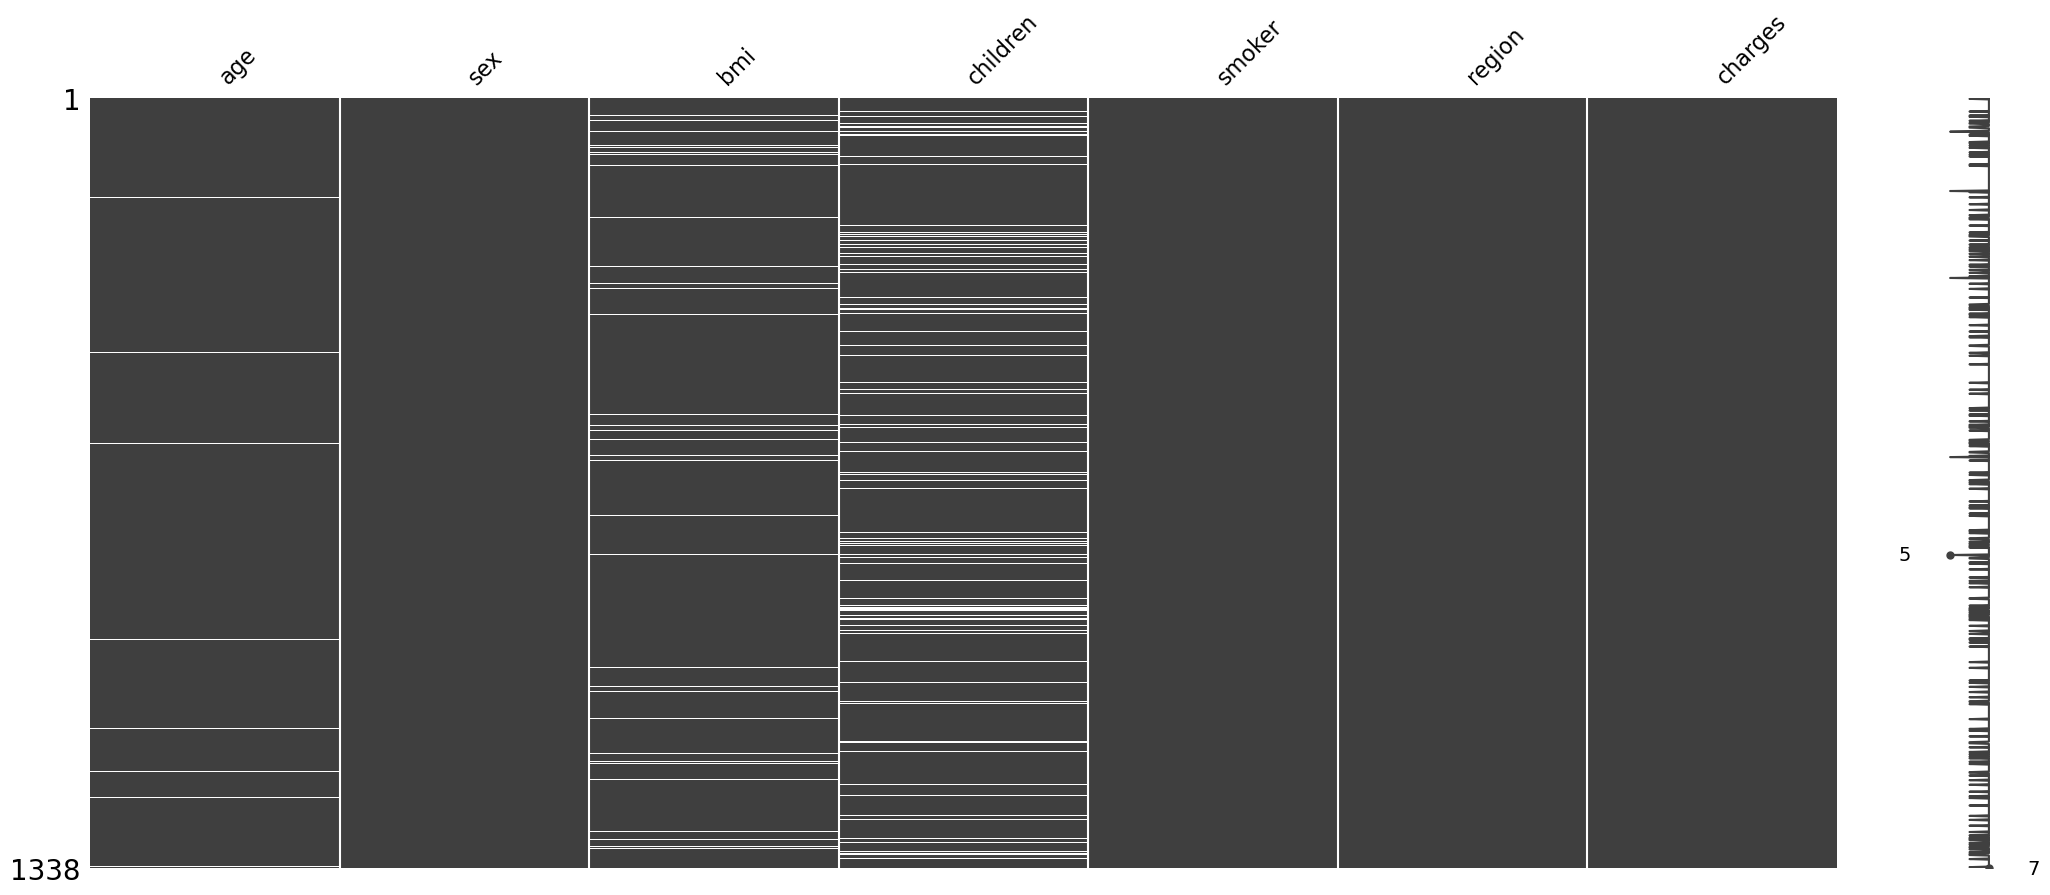

In [7]:
msno.matrix(data)
# Visualize the pattern of missing values in the dataset using missingno matrix plot
# 'age', bmi' and 'children' have missing values

In [8]:
for col in data.columns:
    print(f"{col}: {(data[col].isnull().sum() / len(data) * 100):.1f}%")
# Calculate the percentage of missing values in each column of the DataFrame

age: 1.5%
sex: 0.0%
bmi: 4.0%
children: 9.9%
smoker: 0.0%
region: 0.0%
charges: 0.0%


# Diagnose types of missing values in the dataset

# Types of Missing Data:
Missing data can be categorized into three types:

     * Missing Completely at Random (MCAR): Missingness is unrelated to any data, observed or unobserved.
     * Missing at Random (MAR): Missingness is related to observed data but not the missing data itself.
     * Missing Not at Random (MNAR): Missingness depends on the missing data itself.

Understanding these types helps choose the right method to handle missing values. We need to examine and determine the types of missing data in the columns age, children, and bmi. 

To do this, each column with missing values should be compared pairwise with the other columns. The tool used for this analysis is a histogram. In this method, we first plot the histogram of the column that contains missing values. Then, we plot the same histogram again after removing the rows where missing values occur in the other column. This comparison helps us understand whether the missing values are random or related to other variables, which can indicate whether they are MAR or MNAR.

(array([180., 129.,  94., 114.,  97., 119., 128., 105., 117., 102.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

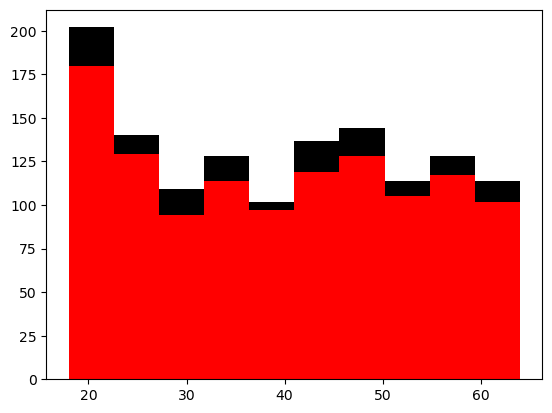

In [9]:
# Examine whether there is any relationship between the missing values in 'children' and the values in 'age'
flags = data['children'].isna()
plt.hist(data.age, color= 'black') # 'bmi' histogram with 'children' missing values
plt.hist(data.age[~flags], color = 'red') # 'bmi' histogram without 'children' missing values

### The histograms in both cases show similar behavior, which indicates that the missing data is of the MCAR type.

### Function

In [27]:
def daignose_mv(data, mv_col):
    cols = data.columns
    flags = data[mv_col].isna()
    fig, ax = plt.subplots(len(cols),3,
                           figsize =(len(cols)+3, len(cols)+3),
                           constrained_layout = True)
    
    plt.rcParams['axes.grid'] = True
    for i, col in enumerate(cols):
        n1, bins,_ = ax[i, 0].hist(data[col])
        ax[i,1].set_title(f'{col} with MVs')
        n2,_,_ = ax[i,1].hist(data[col][~flags], bins = bins)
        ax[i,1].set_title(f'{col} without MVs')
        
        if col == 'charges' :
            bins/=1e4
        ax[i,2].bar(bins[:-1], np.abs(n2-n1))
        ax[i,2].set_title('Difference')

## 1 - children

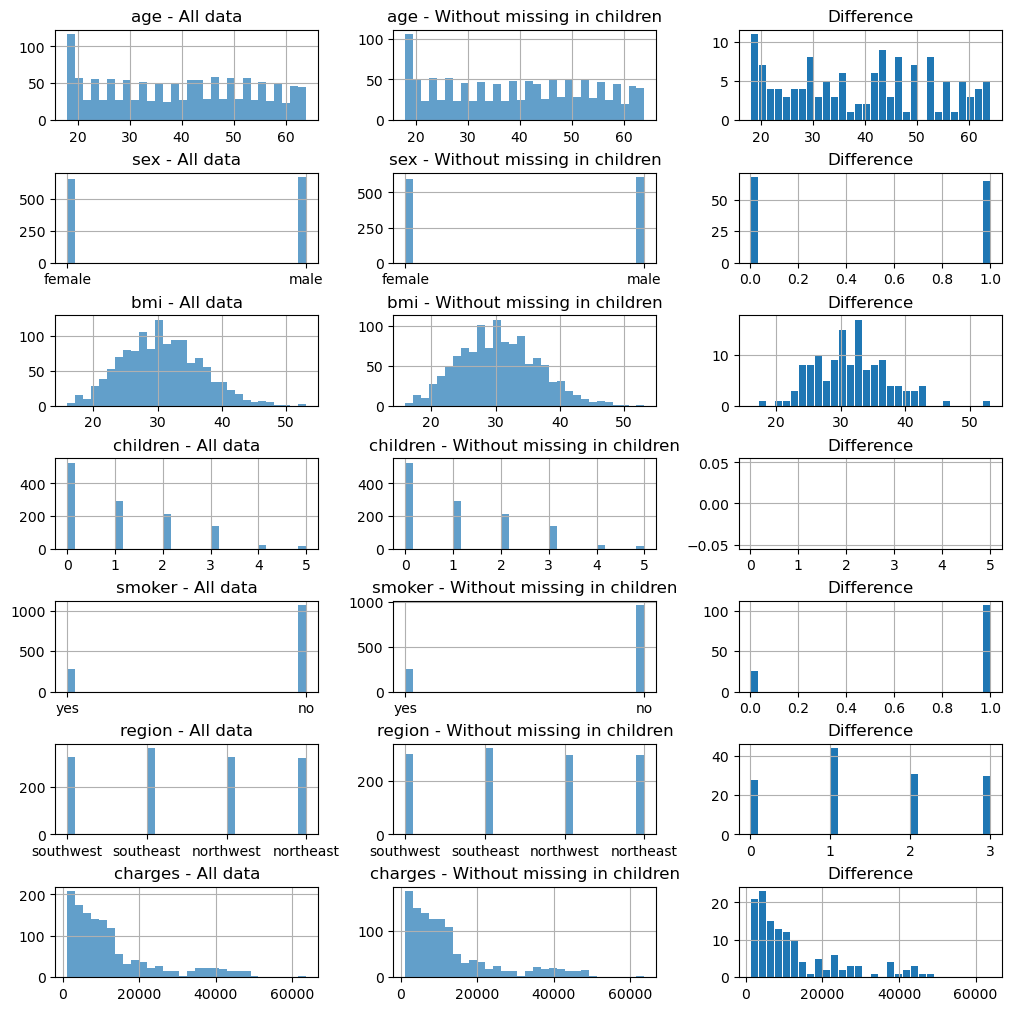

In [28]:
diagnose_mv(data, 'children')

## 2 - bmi

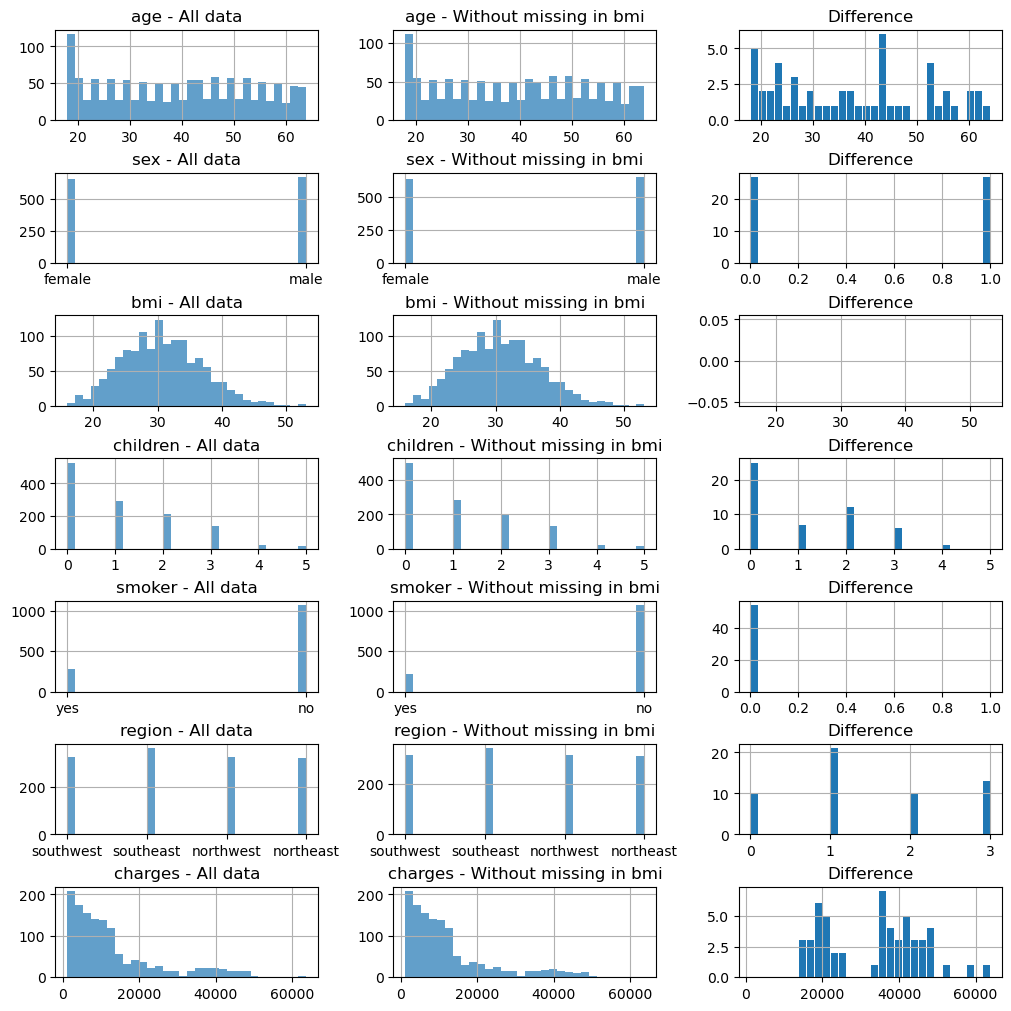

In [29]:
diagnose_mv(data, 'bmi')

## 3 - age

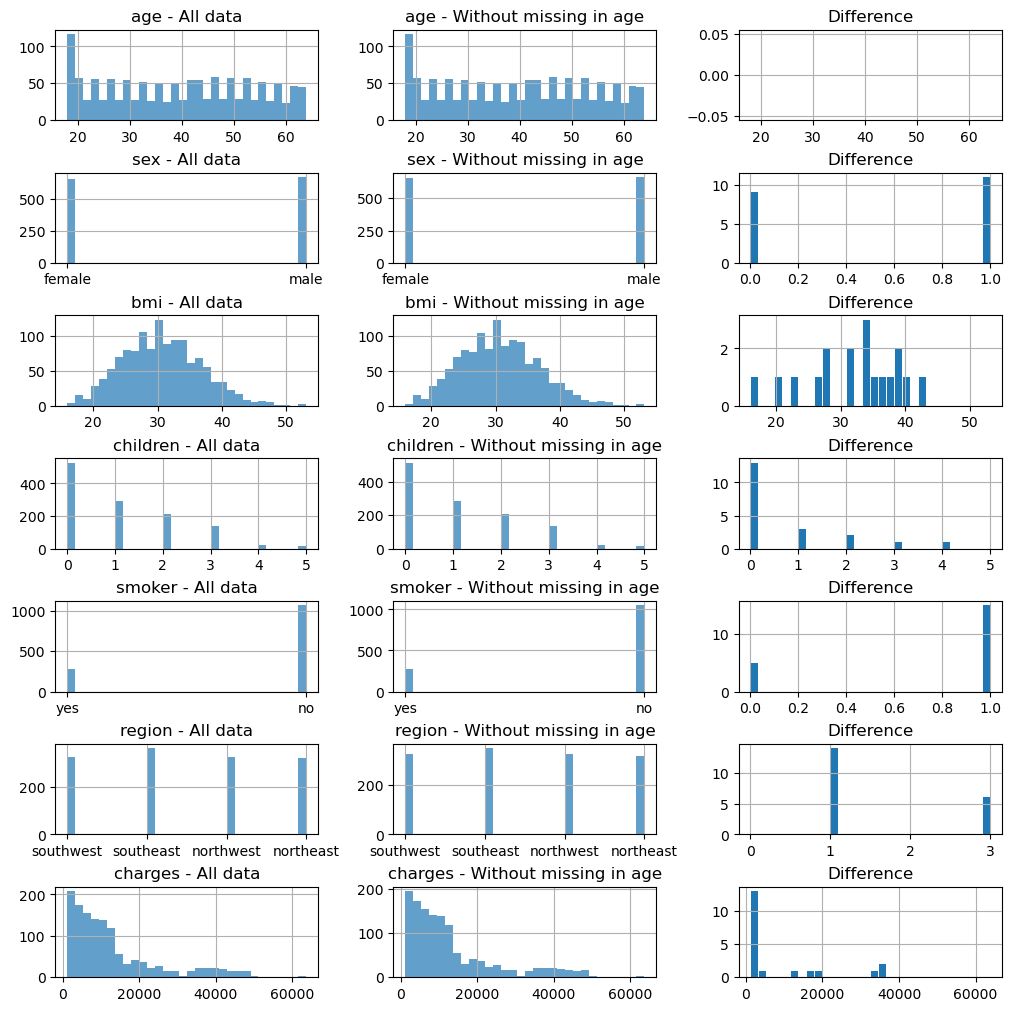

In [30]:
diagnose_mv(data, 'age')